# What this Notebook is about?

This Notebook is part of the Data Science for Management course I'm teaching at the University of Florence during 2016/2017 academic year. 

Here I cover basic Numpy, Pandas and Matplotlib commands.

Companions tutorials for the same course are [Introduction to Python for scripting](https://github.com/andrgig/Data-Science-for-Management/blob/master/Python%20Course%20for%20Data%20Science.ipynb) and [R Course for Data Science](https://github.com/andrgig/Data-Science-for-Management/blob/master/R%20Course%20for%20Data%20Science.ipynb).

For suggestions you can contact me on [Linkedin](https://it.linkedin.com/in/agigli) or [Twitter](https://twitter.com/andrgig).

*Andrea Gigli, PhD in Applied Statistics, MSc in Big Data Analytics and Social Mining*

---


# Pandas and Matplotlib

The pandas library is used for all the data analysis excluding a small piece of the data presentation section. The matplotlib library will only be needed for the data presentation section. Importing the libraries is the first step we will take in the lesson.


In [95]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

matplotlib.style.use('ggplot') #I need to use this because there's currently a bug in Pandas 0.17.1 with Matplotlib 1.5.0

In [96]:
broken_df = pd.read_csv("data/bikes.csv") #error!!!

In [131]:
broken_df = pd.read_csv("data/bikes.csv", encoding = "UTF-8") #encoding needed

In [132]:
broken_df[:3] #something wrong here...

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


In [134]:
fixed_df = pd.read_csv("data/bikes.csv", sep=';', encoding = "UTF-8", parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [135]:
# Displays the top 5 rows. Accepts an optional int parameter - num. of rows to show
fixed_df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [136]:
# Similar to head, but displays the last rows
fixed_df.tail()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-11-01,2405,NaN,1208,1701,3082,2076,165,2461,NaN
2012-11-02,1582,NaN,737,1109,2277,1392,97,1888,NaN
2012-11-03,844,NaN,380,612,1137,713,105,1302,NaN
2012-11-04,966,NaN,446,710,1277,692,197,1374,NaN
2012-11-05,2247,NaN,1170,1705,3221,2143,179,2430,NaN


In [137]:
# The dimensions of the dataframe as a (rows, cols) tuple
fixed_df.shape

(310, 9)

In [138]:
# The number of columns. Equal to df.shape[0]
len(fixed_df) 

310

In [139]:
# An array of the column names
fixed_df.columns 

Index([u'Berri 1', u'Brébeuf (données non disponibles)', u'Côte-Sainte-Catherine', u'Maisonneuve 1', u'Maisonneuve 2', u'du Parc', u'Pierre-Dupuy', u'Rachel1', u'St-Urbain (données non disponibles)'], dtype='object')

In [140]:
# Columns and their types
fixed_df.dtypes

Berri 1                                  int64
Brébeuf (données non disponibles)      float64
Côte-Sainte-Catherine                    int64
Maisonneuve 1                            int64
Maisonneuve 2                            int64
du Parc                                  int64
Pierre-Dupuy                             int64
Rachel1                                  int64
St-Urbain (données non disponibles)    float64
dtype: object

In [141]:
# Converts the frame to a two-dimensional table
fixed_df.values 

array([[  3.50000000e+01,              nan,   0.00000000e+00, ...,
          1.00000000e+01,   1.60000000e+01,              nan],
       [  8.30000000e+01,              nan,   1.00000000e+00, ...,
          6.00000000e+00,   4.30000000e+01,              nan],
       [  1.35000000e+02,              nan,   2.00000000e+00, ...,
          3.00000000e+00,   5.80000000e+01,              nan],
       ..., 
       [  8.44000000e+02,              nan,   3.80000000e+02, ...,
          1.05000000e+02,   1.30200000e+03,              nan],
       [  9.66000000e+02,              nan,   4.46000000e+02, ...,
          1.97000000e+02,   1.37400000e+03,              nan],
       [  2.24700000e+03,              nan,   1.17000000e+03, ...,
          1.79000000e+02,   2.43000000e+03,              nan]])

In [142]:
# Displays descriptive stats for all columns
fixed_df.describe()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0.0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


In [143]:
# Select two columns
fixed_df[["Berri 1", "Rachel1"]][:10]

,Berri 1,Rachel1
Date,,
2012-01-01,35,16
2012-01-02,83,43
2012-01-03,135,58
2012-01-04,144,61
2012-01-05,197,95
2012-01-06,146,75
2012-01-07,98,54
2012-01-08,95,63
2012-01-09,244,173


In [144]:
# Selects only the column named 'col1';
fixed_df.Rachel1[:10]

Date
2012-01-01     16
2012-01-02     43
2012-01-03     58
2012-01-04     61
2012-01-05     95
2012-01-06     75
2012-01-07     54
2012-01-08     63
2012-01-09    173
2012-01-10    241
Name: Rachel1, dtype: int64

In [145]:
fixed_df['Berri 1'][:10]

Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
2012-01-06    146
2012-01-07     98
2012-01-08     95
2012-01-09    244
2012-01-10    397
Name: Berri 1, dtype: int64

In [146]:
# Selects second row
fixed_df.iloc[1]

Berri 1                                 83.0
Brébeuf (données non disponibles)        NaN
Côte-Sainte-Catherine                    1.0
Maisonneuve 1                           68.0
Maisonneuve 2                          153.0
du Parc                                 53.0
Pierre-Dupuy                             6.0
Rachel1                                 43.0
St-Urbain (données non disponibles)      NaN
Name: 2012-01-02 00:00:00, dtype: float64

In [147]:
# Selects rows 1-to-3
fixed_df.iloc[1:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [148]:
#Filtering by index
fixed_df.ix['2012-06-01':'2012-07-01'].head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-06-01,6097,NaN,2604,4110,7175,3895,1692,6595,NaN
2012-06-02,943,NaN,392,630,1289,628,71,1436,NaN
2012-06-03,2755,NaN,1897,2020,3768,2324,1312,4936,NaN
2012-06-04,2717,NaN,1408,2095,4276,2168,333,3090,NaN
2012-06-05,5842,NaN,2721,3927,7302,3786,1232,5348,NaN


In [149]:
fixed_df.ix['2012-06-01':].head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-06-01,6097,NaN,2604,4110,7175,3895,1692,6595,NaN
2012-06-02,943,NaN,392,630,1289,628,71,1436,NaN
2012-06-03,2755,NaN,1897,2020,3768,2324,1312,4936,NaN
2012-06-04,2717,NaN,1408,2095,4276,2168,333,3090,NaN
2012-06-05,5842,NaN,2721,3927,7302,3786,1232,5348,NaN


In [150]:
fixed_df.ix[:'2012-06-01'].head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [151]:
# First row, first column
fixed_df.iloc[0,0]

35.0

In [152]:
# First 4 rows and first 2 columns
fixed_df.iloc[0:4, 0:2]

,Berri 1,Brébeuf (données non disponibles)
Date,,
2012-01-01,35,NaN
2012-01-02,83,NaN
2012-01-03,135,NaN
2012-01-04,144,NaN


In [153]:
#I need to set fonts in my laptop, maybe you don't need this step
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue') 
matplotlib.rc('text', usetex='false') 

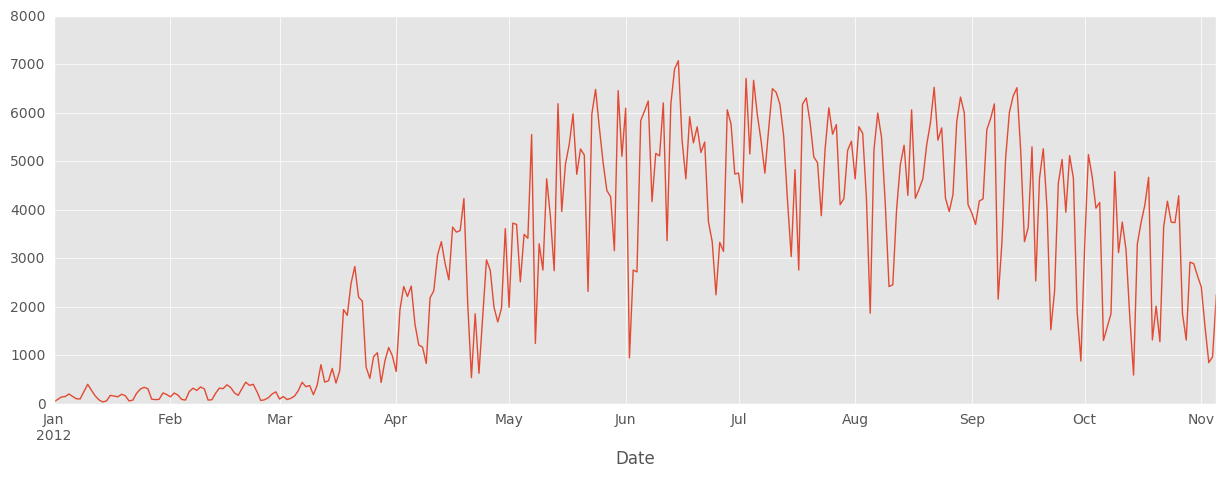

In [154]:
fixed_df['Berri 1'].plot()

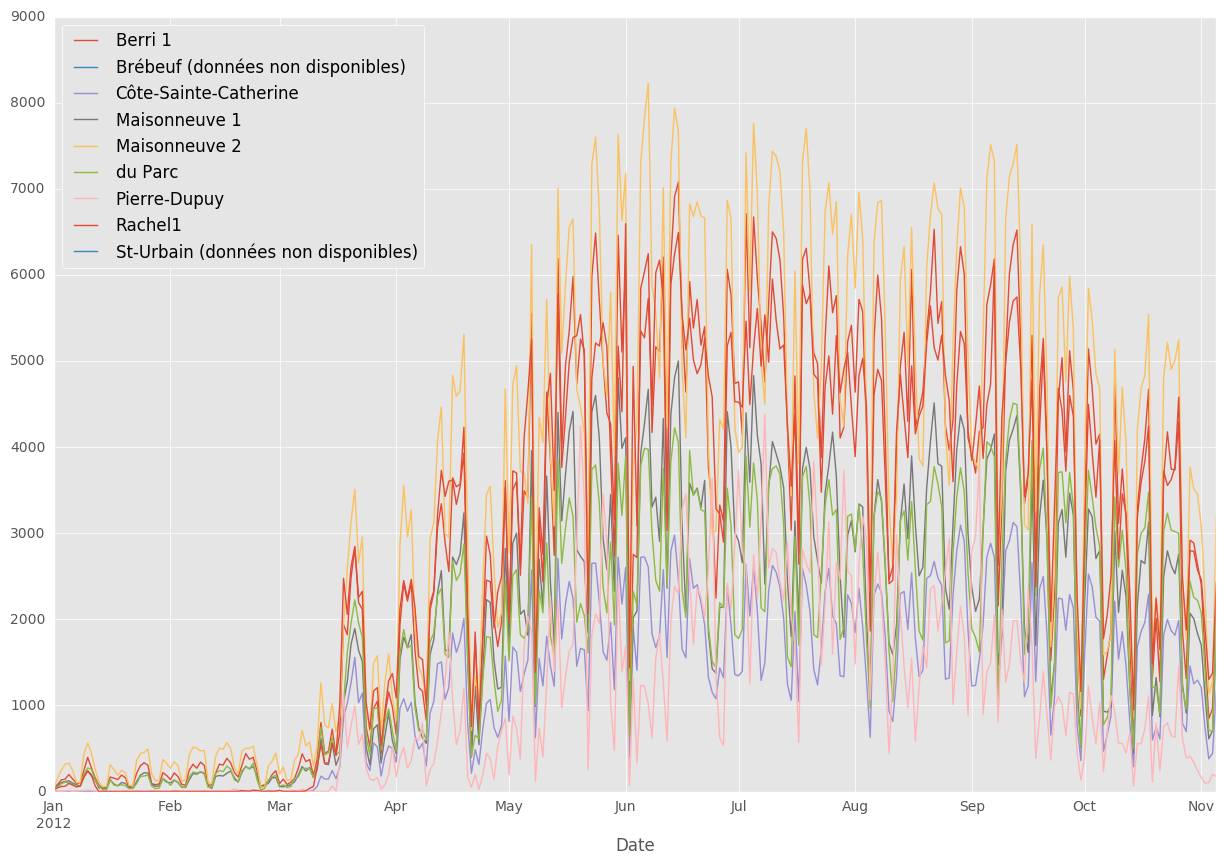

In [155]:
fixed_df.plot(figsize=(15, 10))

In [156]:
#get the day of the week
fixed_df.index.day 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13

In [157]:
#These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.
fixed_df.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

In [158]:
fixed_df.loc[:,'weekday'] = fixed_df.index.weekday
fixed_df.columns

Index([u'Berri 1', u'Brébeuf (données non disponibles)', u'Côte-Sainte-Catherine', u'Maisonneuve 1', u'Maisonneuve 2', u'du Parc', u'Pierre-Dupuy', u'Rachel1', u'St-Urbain (données non disponibles)', u'weekday'], dtype='object')

In [159]:
weekday_counts = fixed_df.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
weekday,,,,,,,,,
0,134298,NaN,60329,90051,163767,90184,46204,130130,NaN
1,135305,NaN,58708,92035,165880,91399,35167,120088,NaN
2,152972,NaN,67344,104891,186061,102103,43263,133088,NaN
3,160131,NaN,69028,111895,196715,105674,45385,140241,NaN
4,141771,NaN,56446,98568,172390,89872,42470,137255,NaN
5,101578,NaN,34018,62067,105060,48289,52861,112828,NaN
6,99310,NaN,36466,55324,98308,50004,61485,117150,NaN


In [160]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Monday,134298,NaN,60329,90051,163767,90184,46204,130130,NaN
Tuesday,135305,NaN,58708,92035,165880,91399,35167,120088,NaN
Wednesday,152972,NaN,67344,104891,186061,102103,43263,133088,NaN
Thursday,160131,NaN,69028,111895,196715,105674,45385,140241,NaN
Friday,141771,NaN,56446,98568,172390,89872,42470,137255,NaN
Saturday,101578,NaN,34018,62067,105060,48289,52861,112828,NaN
Sunday,99310,NaN,36466,55324,98308,50004,61485,117150,NaN


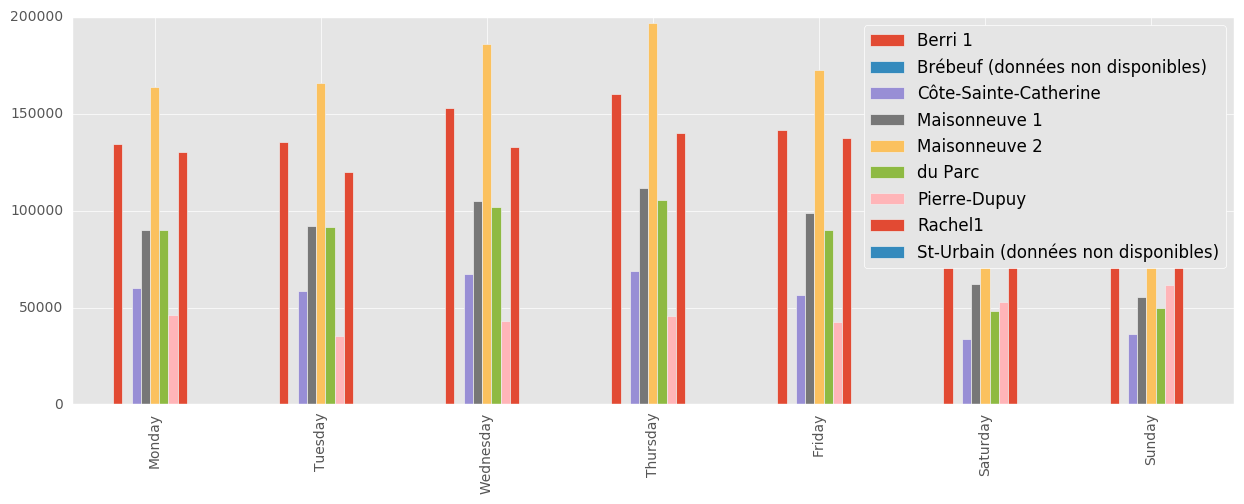

In [161]:
weekday_counts.plot(kind='bar')

-----

In [162]:
# SQL-style join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


-----------

In [163]:
# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [164]:
complaints = pd.read_csv("data/311-service-requests.csv") #do you see any warning?

C:\Program Files\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [165]:
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unsp

### Exercise

show the column `Descriptor`
show the first 8 rows of `Descriptor`
show the column names

In [166]:
complaints[['Complaint Type', 'Borough']][0:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


In [167]:
# Query by a single column value
complaints[complaints["Borough"]=="QUEENS"] 

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,109 STREET,107 AVENUE,109 AVENUE,NaN,NaN,ADDRESS,SOUTH RICHMOND HILL,NaN,Precinct,Assigned,10/31/2013 09:46:40 AM,10/31/2013 01:59:51 AM,10 QUEENS,QUEENS,1030919.0,187622.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,CROSSBAY BOULEVARD,PITKIN AVENUE,VAN WICKLEN ROAD,NaN,NaN,ADDRESS,OZONE PARK,NaN,Precinct,Closed,10/31/2013 09:44:19 AM,10/31/2013 01:58:49 AM,10 QUEENS,QUEENS,1027776.0,184076.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"
22,26589678,10/31/2013 12:39:55 AM,NaN,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11419,NaN,NaN,NaN,NaN,112 STREET,ATLANTIC AVENUE,INTERSECTION,SOUTH RICHMOND HILL,NaN,Precinct,Open,10/31/2013 08:39:55 AM,NaN,09 QUEENS,QUEENS,1030314.0,191578.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4

In [168]:
# Query by a single column, if it is in a list of predefined values
complaints[complaints['Borough'].isin(['QUEENS', 'MANHATTAN'])] 

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unsp

In [169]:
# A conjunction query using two columns
complaints[(complaints['Complaint Type'] == 'QUEENS') & (complaints['Descriptor'] == 'Loud Music/Party')] 

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [170]:
# A disjunction query using two columns
complaints[(complaints['Complaint Type'] == 'Noise - Street/Sidewalk') | (complaints['Location Type'] == 'Street/Sidewalk')]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,109 STREET,107 AVENUE,109 AVENUE,NaN,NaN,ADDRESS,SOUTH RICHMOND HILL,NaN,Precinct,Assigned,10/31/2013 09:46:40 AM,10/31/2013 01:59:51 AM,10 QUEENS,QUEENS,1030919.0,187622.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
12,26594169,10/31/2013 01:20:57 AM,10/31/2013 02:12:31 AM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Vehicle,Street/Sidewalk,10029,65 EAST 99 STREET,EAST 99 STREET,MADISON AVENUE,PARK AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:20:57 AM,10/31/2013 01:42:05 AM,11 MANHATTAN,MANHATTAN,997470.0,226725.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.788974,-73.952259,"(40.78897400211689, -73.95225898702977)"
13,26594391,10/31/2013 01:20:13 AM,NaN,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,10466,NaN,NaN,NaN,NaN,STRANG AVENUE,AMUNDSON AVENUE,INTERSECTION,BRONX,NaN,Precinct,Open,10/31/2013 09:20:13 AM,NaN,12 BRONX,BRONX,1029467.0,264124.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,

In [171]:
# A query checking the textual content of the cells
complaints[complaints["Complaint Type"].str.contains('Noise')][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,CROSSBAY BOULEVARD,PITKIN AVENUE,VAN WICKLEN ROAD,NaN,NaN,ADDRESS,OZONE PARK,NaN,Precinct,Closed,10/31/2013 09:44:19 AM,10/31/2013 01:58:49 AM,10 QUEENS,QUEENS,1027776.0,184076.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"


In [172]:
complaints['Complaint Type'].value_counts()

HEATING                                 14200
GENERAL CONSTRUCTION                     7471
Street Light Condition                   7117
DOF Literature Request                   5797
PLUMBING                                 5373
PAINT - PLASTER                          5149
Blocked Driveway                         4590
NONCONST                                 3998
Street Condition                         3473
Illegal Parking                          3343
Noise                                    3321
Traffic Signal Condition                 3145
Dirty Conditions                         2653
Water System                             2636
Noise - Commercial                       2578
ELECTRIC                                 2350
Broken Muni Meter                        2070
Noise - Street/Sidewalk                  1928
Sanitation Condition                     1824
Rodent                                   1632
Sewer                                    1627
Consumer Complaint                

### Exercise
- show the top 10 `Complaint Type`
- plot them

In [173]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,CAMPBELL AVENUE,HENDERSON AVENUE,WINEGAR LANE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:54:03 AM,10/31/2013 02:07:14 AM,01 STATEN ISLAND,STATEN ISLAND,952013.0,171076.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,PRINCETON LANE,HAMPTON GREEN,DEAD END,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:35:18 AM,10/31/2013 01:45:17 AM,03 STATEN ISLAND,STATEN ISLAND,929577.0,140964.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


In [174]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,AVENUE J,EAST 80 STREET,EAST 81 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Open,10/31/2013 08:30:36 AM,NaN,18 BROOKLYN,BROOKLYN,1008937.0,170310.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,LEFFERTS AVENUE,WASHINGTON AVENUE,BEDFORD AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 08:05:10 AM,10/31/2013 01:29:29 AM,09 BROOKLYN,BROOKLYN,995366.0,180388.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,NaN,NaN,NaN,DOBBIN STREET,NORMAN STREET,INTERSECTION,BROOKLYN,NaN,Precinct,Closed,10/31/2013 07:26:32 AM,10/31/2013 12:18:54 AM,01 BROOKLYN,BROOKLYN,996925.0,203271.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,DITMAS AVENUE,NaN,NaN,NaN,NaN,LATLONG,BROOKLYN,NaN,Precinct,Closed,10/31/2013 06:02:58 AM,10/30/2013 10:23:20 PM,01 BROOKLYN,BROOKLYN,991895.0,171051.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636169,-73.972455,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,BEVERLY ROAD,CHURCH AVENUE,EAST 2 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 04:38:25 AM,10/30/2013 10:26:28 PM,12 BROOKLYN,BROOKLYN,990144.0,173511.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"


In [175]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


In [176]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

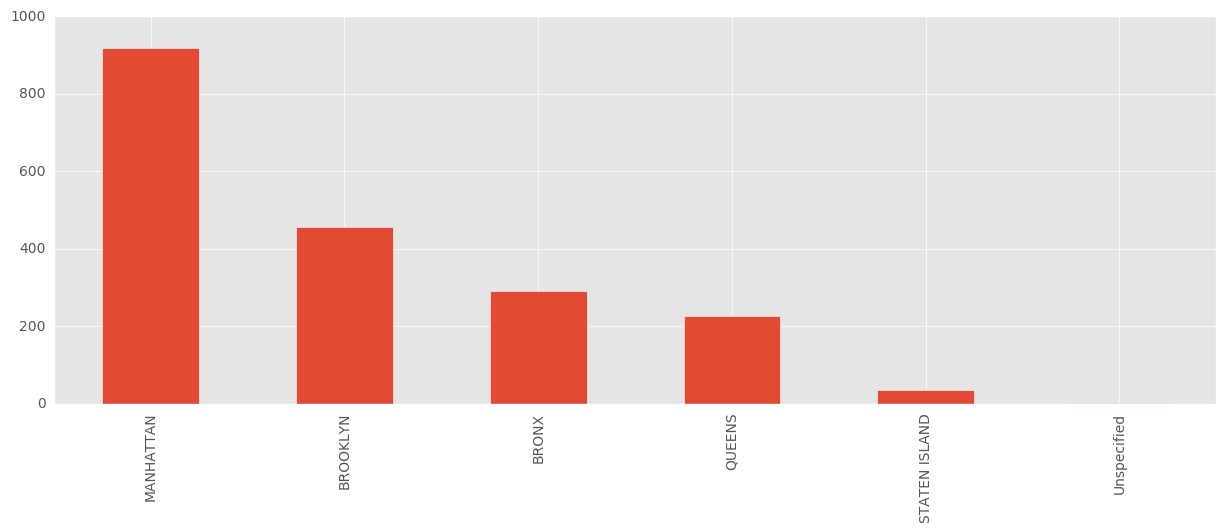

In [177]:
noise_complaints['Borough'].value_counts().plot(kind='bar')

In [178]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()
noise_complaint_counts / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

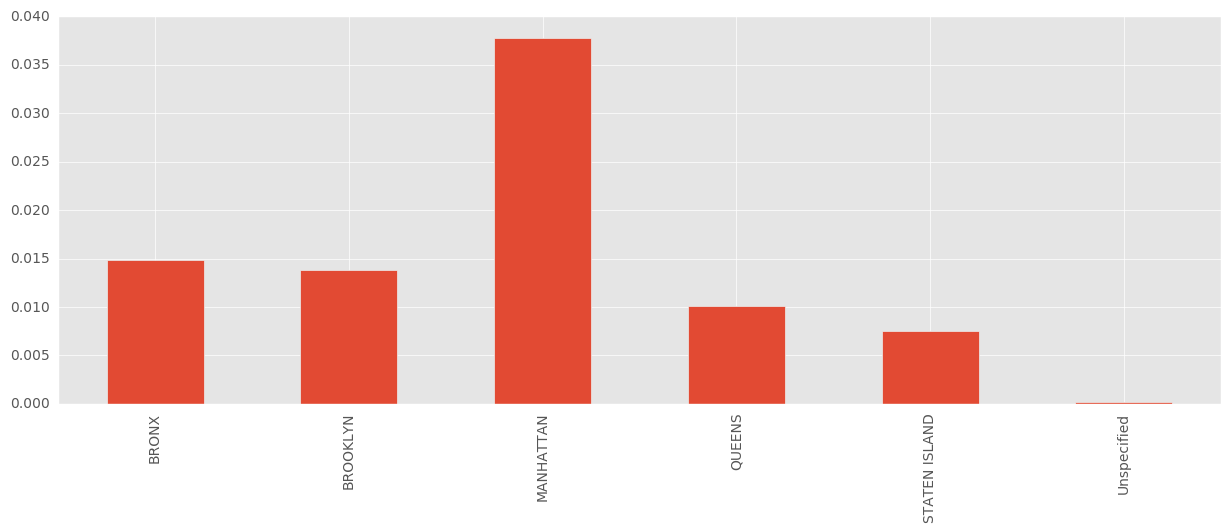

In [179]:
(noise_complaint_counts / complaint_counts).plot(kind='bar')

Now let's work on weather data. To see how to get the dataset scraping the Open data look at the [following notebook](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%205%20-%20Combining%20dataframes%20and%20scraping%20Canadian%20weather%20data.ipynb)

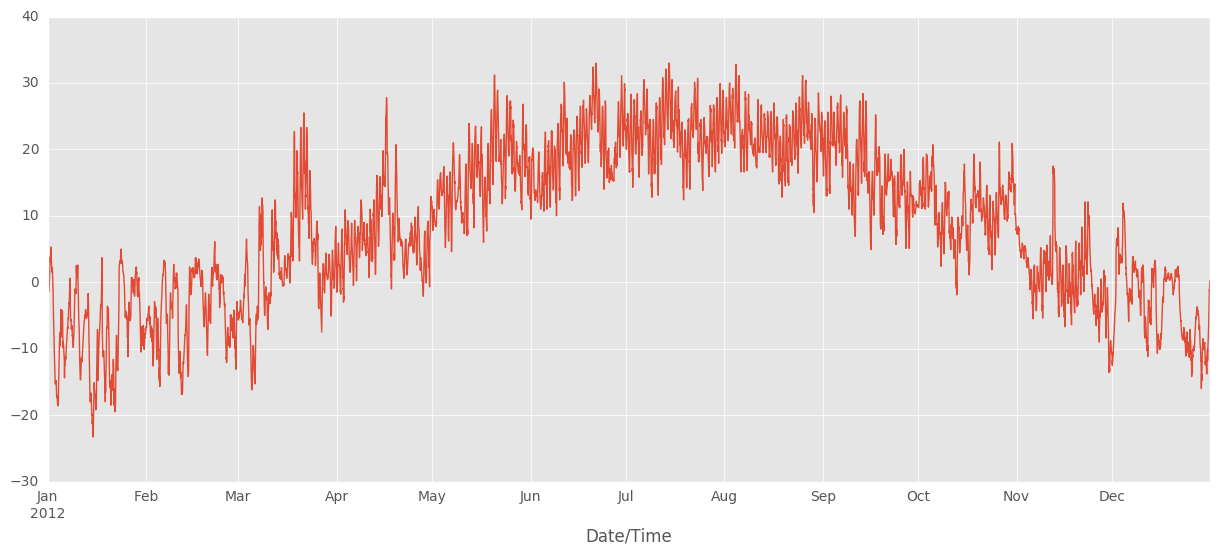

In [182]:
weather_2012_final = pd.read_csv('data/weather_2012.csv', index_col='Date/Time', encoding = "ISO-8859-1", parse_dates=True)
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

In [183]:
weather_2012_final[:20]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog


In [184]:
from numpy import median
temperatures = weather_2012_final[['Temp (C)']].copy()
temperatures.head(5)

,Temp (C)
Date/Time,
2012-01-01 00:00:00,-1.8
2012-01-01 01:00:00,-1.8
2012-01-01 02:00:00,-1.8
2012-01-01 03:00:00,-1.5
2012-01-01 04:00:00,-1.5


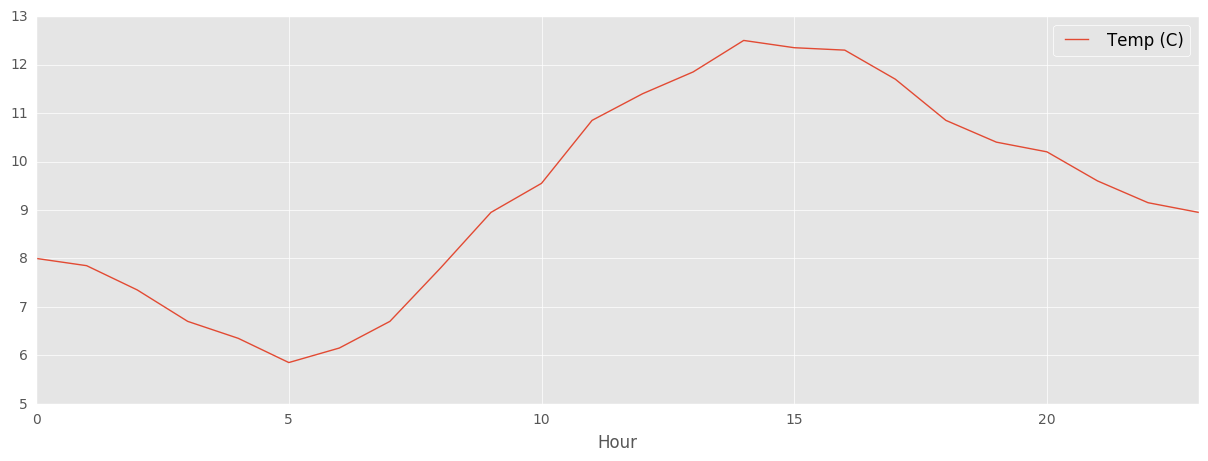

In [185]:
temperatures.loc[:,'Hour'] = weather_2012_final.index.hour
temperatures.groupby('Hour').aggregate(median).plot()

In [186]:
weather_description = weather_2012_final['Weather']
is_snowing = weather_description.str.contains('Snow')
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

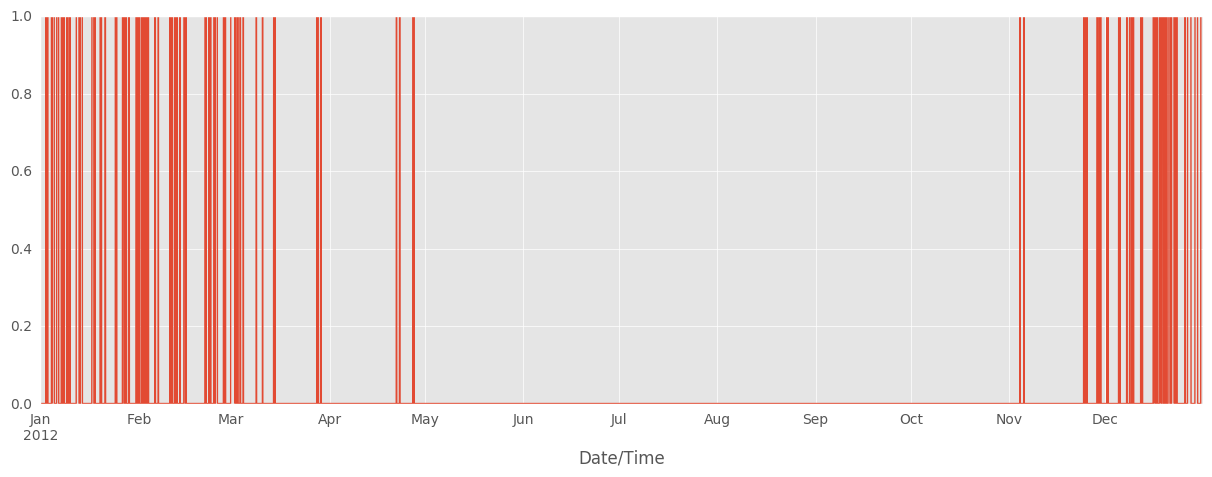

In [187]:
# More useful!
is_snowing.plot()

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


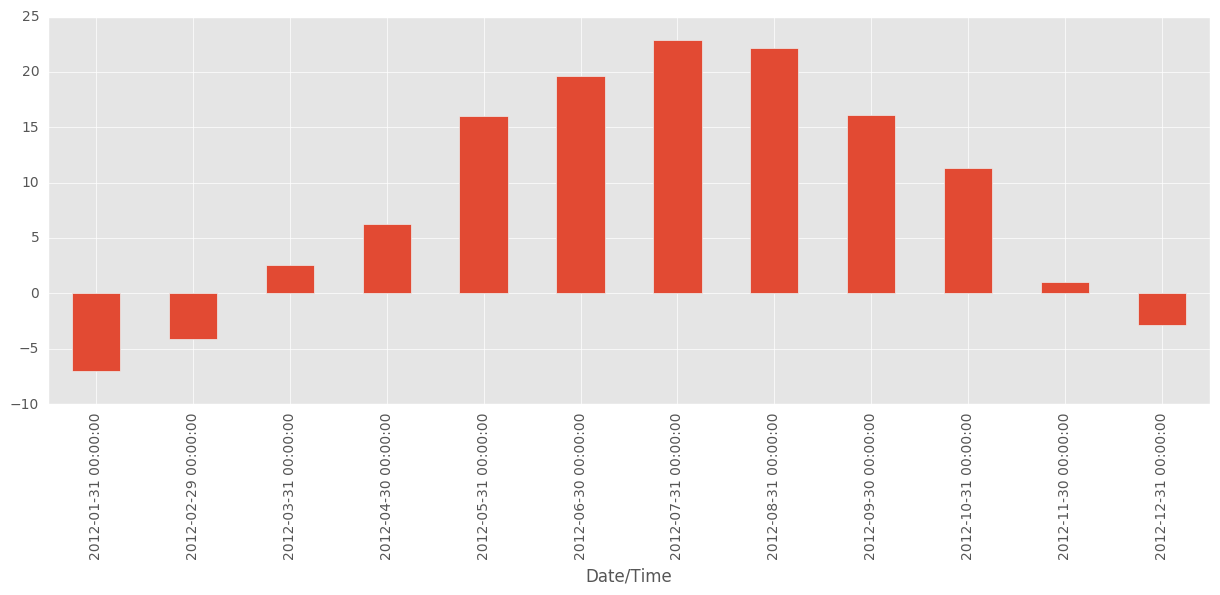

In [188]:
weather_2012_final['Temp (C)'].resample('M', how=median).plot(kind='bar')

In [189]:
is_snowing.astype(float).resample('M', how=median)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


Date/Time
2012-01-31    0.0
2012-02-29    0.0
2012-03-31    0.0
2012-04-30    0.0
2012-05-31    0.0
2012-06-30    0.0
2012-07-31    0.0
2012-08-31    0.0
2012-09-30    0.0
2012-10-31    0.0
2012-11-30    0.0
2012-12-31    0.0
Freq: M, Name: Weather, dtype: float64

In [190]:
from numpy import mean
is_snowing.astype(float).resample('M', how=mean)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  from ipykernel import kernelapp as app


Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


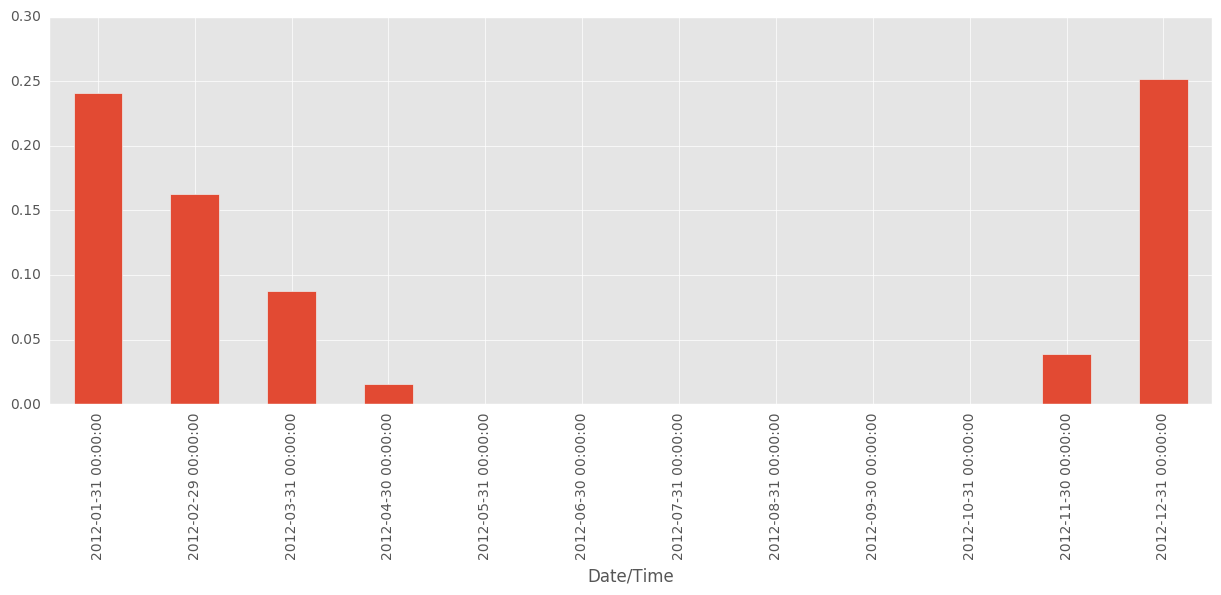

In [191]:
is_snowing.astype(float).resample('M', how=mean).plot(kind='bar')

In [192]:
temperature = weather_2012_final['Temp (C)'].resample('M', how=median)
is_snowing = weather_2012_final['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M', how=mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  app.launch_new_instance()


In [193]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


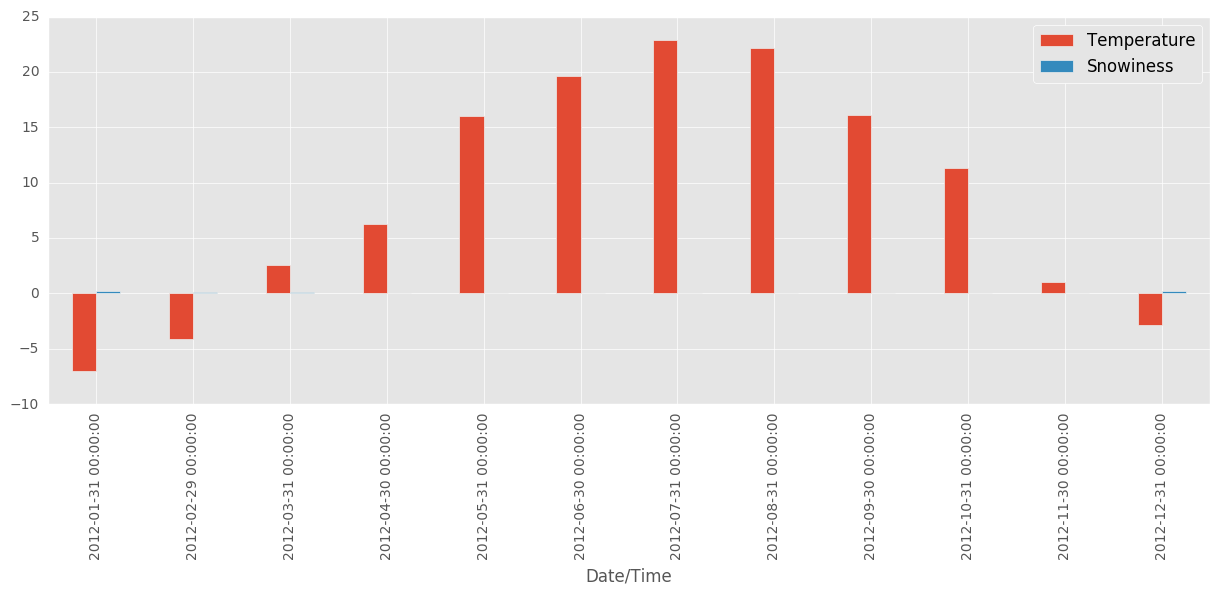

In [194]:
stats.plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016588B00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015D82860>], dtype=object)

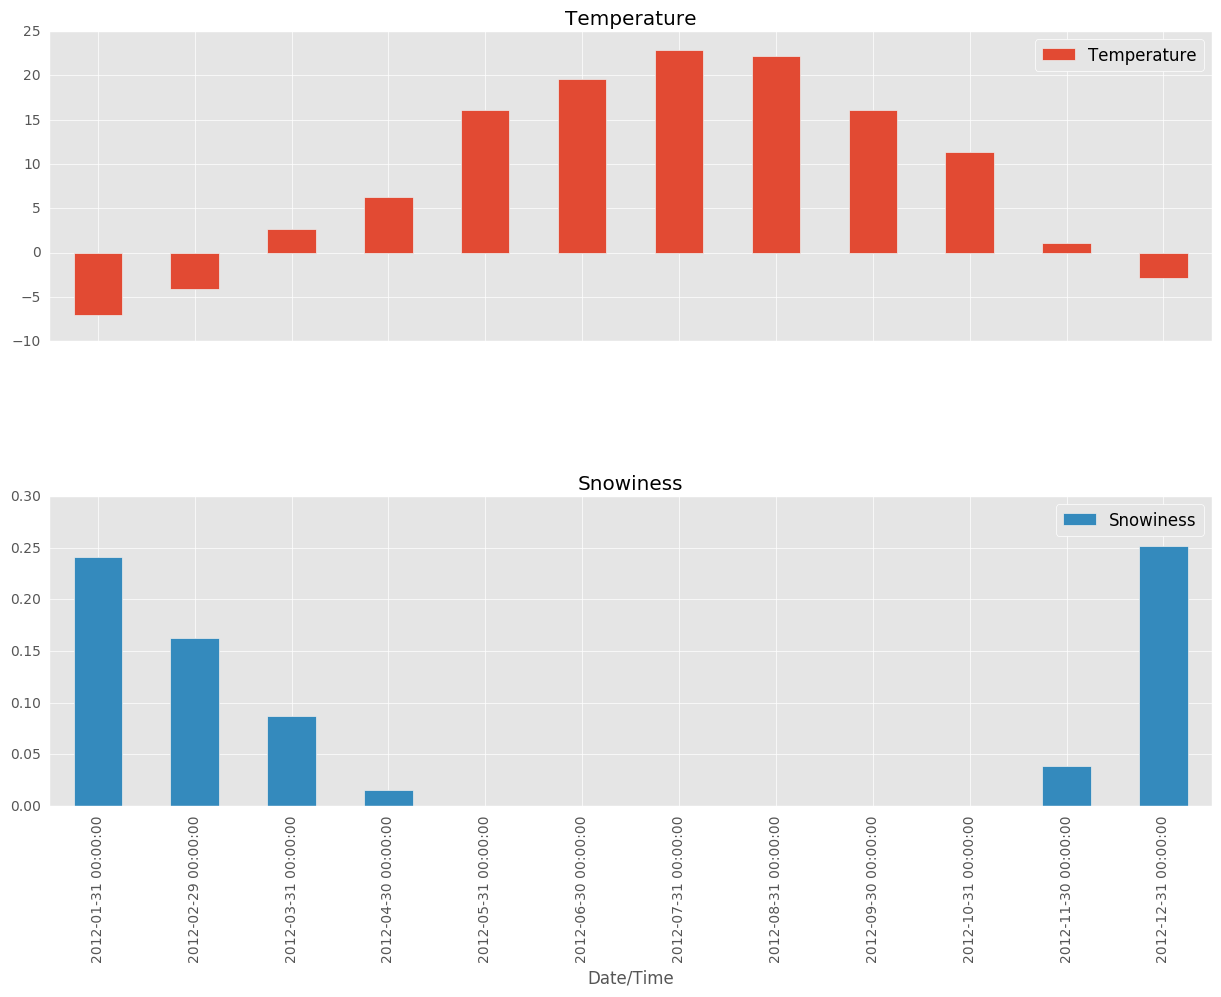

In [195]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))

-----

"The Olive Oils data has eight explanatory variables (levels of fatty acids in the oils) and nine classes (areas of Italy). The goal of the analysis is to develop rules that reliably distinguish oils from the nine different areas. It is a problem of practical interest, because oil from some areas is more highly valued and unscrupulous suppliers sometimes make false claims about the origin of their oil. The content of the oils is a subject of study in its own right: Olive oil has high nutritional value, and some of its constituent fatty acids are considered to be more beneficial than others."

In addition, fatty acid contents vary with climate: this information is important in deciding which varieties to grow where.

In [198]:
%matplotlib inline
import matplotlib.colors as colors

In [199]:
olives = pd.read_csv("data/olive.csv")
olives.head(5)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [201]:
from IPython.display import Image
Image(filename='data/Italy.png')

IOError: [Errno 2] No such file or directory: u'data/Italy.png'

In [202]:
print(olives.columns)
olives.rename(columns={olives.columns[0]:'area_string'}, inplace=True)
olives.columns

Index([u'Unnamed: 0', u'region', u'area', u'palmitic', u'palmitoleic', u'stearic', u'oleic', u'linoleic', u'linolenic', u'arachidic', u'eicosenoic'], dtype='object')


Index([u'area_string', u'region', u'area', u'palmitic', u'palmitoleic', u'stearic', u'oleic', u'linoleic', u'linolenic', u'arachidic', u'eicosenoic'], dtype='object')

In [203]:
print('regions\t', olives.region.unique())
print('areas\t', olives.area.unique())

('regions\t', array([1, 2, 3], dtype=int64))
('areas\t', array([1, 2, 3, 4, 5, 6, 9, 7, 8], dtype=int64))


In [204]:
pd.crosstab(olives.area, olives.region)

region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


In [205]:
olives.head()

,area_string,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [206]:
#Let's get rid of the junk numbering in df.areastring. For single column Pandas Series we use map. 
olives.area_string=olives.area_string.map(lambda x: x.split('.')[-1])
olives.head()

,area_string,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [207]:
olives[['palmitic','oleic']].head()

,palmitic,oleic
0,1075,7823
1,1088,7709
2,911,8113
3,966,7952
4,1051,7771


In [208]:
dir(olives.groupby('area_string'))

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__format__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__iter__',
 '__len__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_agg_doc',
 '_aggregate',
 '_aggregate_generic',
 '_aggregate_item_by_item',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_block_agg_axis',
 '_builtin_table',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_blocks',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_decide_output_index',
 '_def_str',
 '_define_paths',
 '_dir_additions',
 '_dir_deletions',
 '_get_data_to_aggregate',
 '_get_index',
 '_get_indices',
 '_gotitem',
 '_group_selection',
 '_index_with_as_index',
 '_insert_inaxis_grou

In [209]:
from numpy import median, mean
olives.groupby('area_string').aggregate(mean)
olives.groupby('area_string').aggregate(median)

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
area_string,,,,,,,,,,
Calabria,1.0,2.0,1298.5,118.0,258.0,7296.0,827.0,45.0,65.0,28.0
Coast-Sardinia,2.0,6.0,1135.0,100.0,242.0,7080.0,1330.0,24.0,71.0,2.0
East-Liguria,3.0,7.0,1155.0,80.0,240.0,7740.0,680.0,30.0,70.0,2.0
Inland-Sardinia,2.0,5.0,1100.0,95.0,218.0,7367.0,1120.0,28.0,73.0,2.0
North-Apulia,1.0,1.0,1051.0,60.0,236.0,7820.0,700.0,45.0,75.0,33.0
Sicily,1.0,4.0,1222.0,90.5,272.5,7410.5,823.5,43.0,71.5,38.0
South-Apulia,1.0,3.0,1387.0,179.0,208.0,6937.0,1185.5,34.0,60.0,24.0
Umbria,3.0,9.0,1090.0,60.0,195.0,7955.0,600.0,35.0,44.0,2.0
West-Liguria,3.0,8.0,1035.0,100.0,250.0,7695.0,905.0,0.0,0.0,2.0


In [210]:
olives.groupby('area_string').describe()

arachidic   area  eicosenoic     linoleic   linolenic        oleic     palmitic  palmitoleic  region     stearic
area_string                                                                                                                             
Calabria        count   56.000000   56.0   56.000000    56.000000   56.000000    56.000000    56.000000    56.000000    56.0   56.000000
                mean    63.625000    2.0   28.321429   819.000000   45.571429  7307.178571  1302.232143   121.357143     1.0  262.517857
                std      6.762362    0.0    6.506241    86.190065    6.494353   130.144410    64.645324    20.861821     0.0   34.659377
                min     44.000000    2.0   16.000000   609.000000   27.000000  7029.000000  1132.000000    72.000000     1.0  189.000000
                25%     60.000000    2.0   24.000000   780.000000   42.750000  7233.000000  1260.750000   107.750000     1.0  238.750000
                50%     65.000000    2.0   28.000000   827.000000   45.000000  7296.000000  1298.500000   118.000000     1.0  258.000000
                75%     69.000000    2.0   33.250000   872.500000   48.000000  7379.250000  1352.250000   134.500000     1.0  288.000000
                max     75.000000    2.0   41.000000   950.000000   74.000000  7658.000000  1432.000000   183.000000     1.0  351.000000
Coast-Sardinia  count   33.000000   33.0   33.000000    33.000000   33.000000    33.000000    33.000000    33.000000    33.0   33.000000
                mean    71.969697    6.0    1.878788  1337.272727   23.757576  7085.787879  1138.181818   101.060606     2.0  243.818182
                std      9.593243    0.0    0.739830    42.997291    3.464375    72.574426    34.485916    11.107259     0.0   15.129554
                min     57.000000    6.0    1.000000  1253.000000   15.000000  6882.000000  1076.000000    77.000000     2.0  202.000000
                25%     66.000000    6.0    1.000000  1307.000000   22.000000  7043.000000  1120.000000    95.000000     2.0  238.000000
                50%     71.000000    6.0    2.000000  1330.000000   24.000000  7080.000000  1135.000000   100.000000     2.0  242.000000
                75%     77.000000    6.0    2.000000  1372.000000   25.000000  7135.000000  1160.000000   108.000000     2.0  254.000000
                max     95.000000    6.0    3.000000  1470.000000   33.000000  7243.000000  1213.000000   127.000000     2.0  272.000000
East-Liguria    count   50.000000   50.0   50.000000    50.000000   50.000000    50.000000    50.000000    50.000000    50.0   50.000000
                mean    63.600000    7.0    1.880000   689.400000   26.400000  7746.000000  1145.400000    84.200000     3.0  241.400000
                std     25.695231    0.0    0.746147    69.382407   16.132108   157.155844   104.377846    13.863769     0.0   19.379139
                min     10.000000    7.0    1.000000   530.000000    0.000000  7420.000000   610.000000    50.000000     3.0  190.000000
                25%     42.500000    7.0    1.000000   642.500000   10.000000  7672.500000  1112.500000    80.000000     3.0  230.000000
                50%     70.000000    7.0    2.000000   680.000000   30.000000  7740.000000  1155.000000    80.000000     3.0  240.000000
                75%     80.000000    7.0    2.000000   747.500000   37.500000  7820.000000  1180.000000    90.000000     3.0  250.000000
                max    100.000000    7.0    3.000000   820.000000   70.000000  8410.000000  1400.000000   110.000000     3.0  280.000000
Inland-Sardinia count   65.000000   65.0   65.000000    65.000000   65.000000    65.000000    65.000000    65.000000    65.0   65.000000
                mean    73.784615    5.0    1.969231  1125.076923   28.784615  7360.538462  1097.723077    94.553846     2.0  217.230769
                std     12.917397    0.0    0.749359    33.237924    5.412637    45.371755    36.340623    14.650118     0.0   10.733664
                min     45.000000    5.0    1.00000

In [211]:
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']

#your code here

olives_sub=olives[acidlist].apply(lambda x: x/100.0)
olives_sub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


In [212]:
olives[acidlist]=olives_sub
olives.head()

,area_string,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


In [213]:
olives.palmitic.mean(), olives.palmitic.std(), olives.palmitic.var()

(12.317412587412583, 1.6859226405632808, 2.842335149963865)

In [214]:
import numpy as np
np.sqrt(np.var(olives.palmitic))

1.6844482872943365

In [215]:
olives[acidlist].corr()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
palmitic,1.000000,0.835605,-0.170392,-0.837335,0.460684,0.319327,0.228299,0.501952
palmitoleic,0.835605,1.000000,-0.222185,-0.852438,0.621627,0.093112,0.085481,0.416350
stearic,-0.170392,-0.222185,1.000000,0.113599,-0.197817,0.018917,-0.040979,0.140377
oleic,-0.837335,-0.852438,0.113599,1.000000,-0.850318,-0.218171,-0.319962,-0.424146
linoleic,0.460684,0.621627,-0.197817,-0.850318,1.000000,-0.057439,0.210973,0.089045
linolenic,0.319327,0.093112,0.018917,-0.218171,-0.057439,1.000000,0.620236,0.578319
arachidic,0.228299,0.085481,-0.040979,-0.319962,0.210973,0.620236,1.000000,0.328663
eicosenoic,0.501952,0.416350,0.140377,-0.424146,0.089045,0.578319,0.328663,1.000000


In [216]:
olives[acidlist].cov()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
palmitic,2.842335,0.739522,-0.105556,-5.728752,1.885769,0.069818,0.084793,0.119180
palmitoleic,0.739522,0.275566,-0.042857,-1.815928,0.792300,0.006339,0.009886,0.030781
stearic,-0.105556,-0.042857,0.135019,0.169392,-0.176485,0.000901,-0.003317,0.007264
oleic,-5.728752,-1.815928,0.169392,16.468194,-8.378221,-0.114820,-0.286050,-0.242406
linoleic,1.885769,0.792300,-0.176485,-8.378221,5.895146,-0.018086,0.112848,0.030448
linolenic,0.069818,0.006339,0.000901,-0.114820,-0.018086,0.016819,0.017720,0.010563
arachidic,0.084793,0.009886,-0.003317,-0.286050,0.112848,0.017720,0.048533,0.010197
eicosenoic,0.119180,0.030781,0.007264,-0.242406,0.030448,0.010563,0.010197,0.019834


In [217]:
olives[acidlist].median(), olives[acidlist].mean()

(palmitic       12.010
 palmitoleic     1.100
 stearic         2.230
 oleic          73.025
 linoleic       10.300
 linolenic       0.330
 arachidic       0.610
 eicosenoic      0.170
 dtype: float64, palmitic       12.317413
 palmitoleic     1.260944
 stearic         2.288654
 oleic          73.117483
 linoleic        9.805280
 linolenic       0.318881
 arachidic       0.580979
 eicosenoic      0.162815
 dtype: float64)

In [218]:
#I need to set fonts in my laptop, maybe you don't need this step
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue') 
matplotlib.rc('text', usetex='false') 

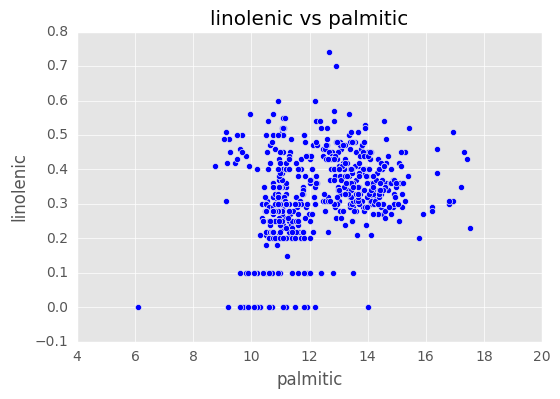

In [219]:
fig = plt.figure()
plt.scatter(olives.palmitic, olives.linolenic)
axis = fig.gca() #get current axis
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')
#ax can be got with fig.gca()

(array([   1.,    0.,   11.,   71.,  188.,   79.,  131.,   73.,    9.,    9.]),
 array([  6.1  ,   7.243,   8.386,   9.529,  10.672,  11.815,  12.958,
         14.101,  15.244,  16.387,  17.53 ]),
 <a list of 10 Patch objects>)

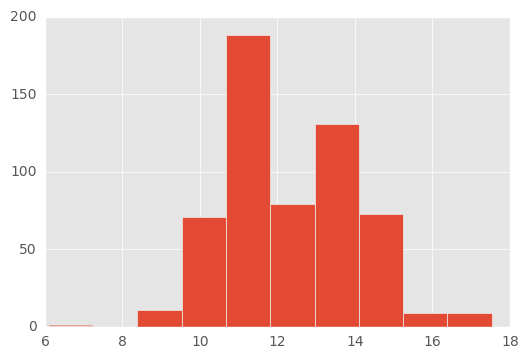

In [220]:
plt.hist(olives.palmitic)

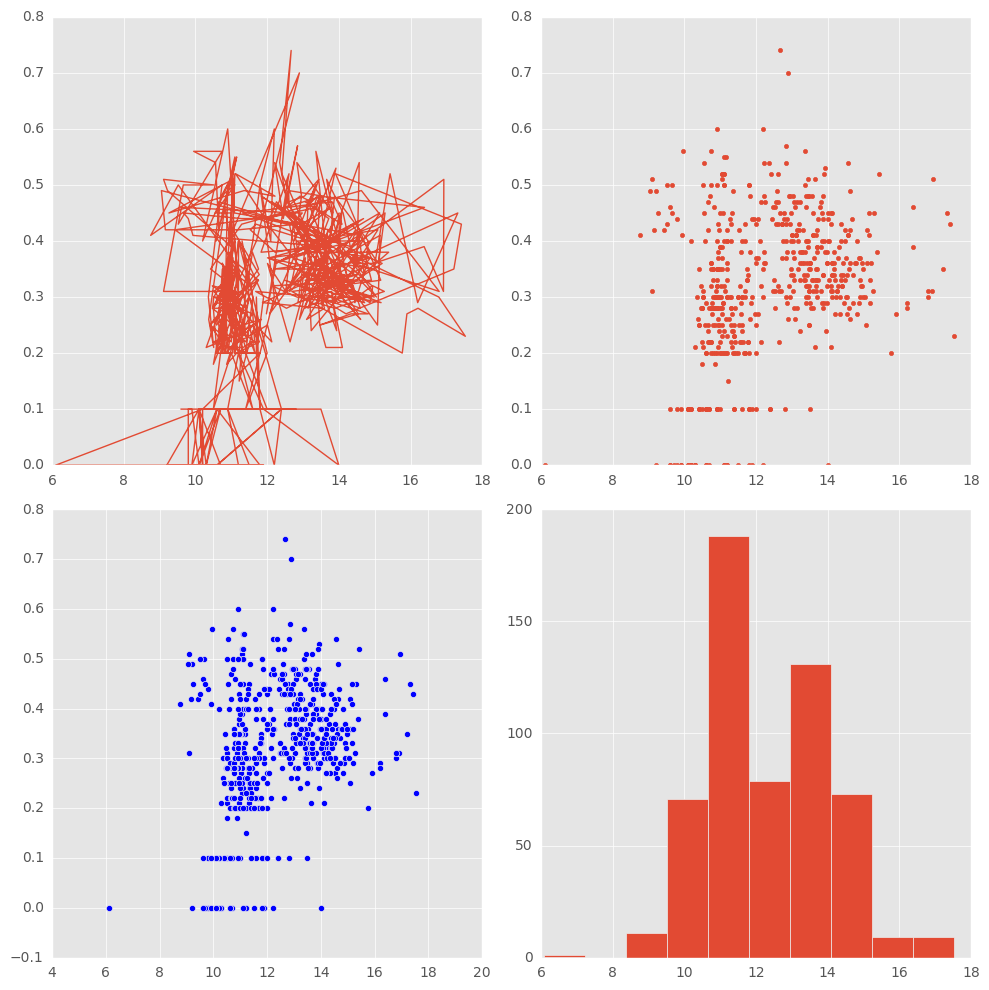

In [221]:
fig, axes=plt.subplots(figsize=(10,10), nrows=2, ncols=2)
axes[0][0].plot(olives.palmitic, olives.linolenic)
axes[0][1].plot(olives.palmitic, olives.linolenic, '.')
axes[1][0].scatter(olives.palmitic, olives.linolenic)
axes[1][1].hist(olives.palmitic)
fig.tight_layout()

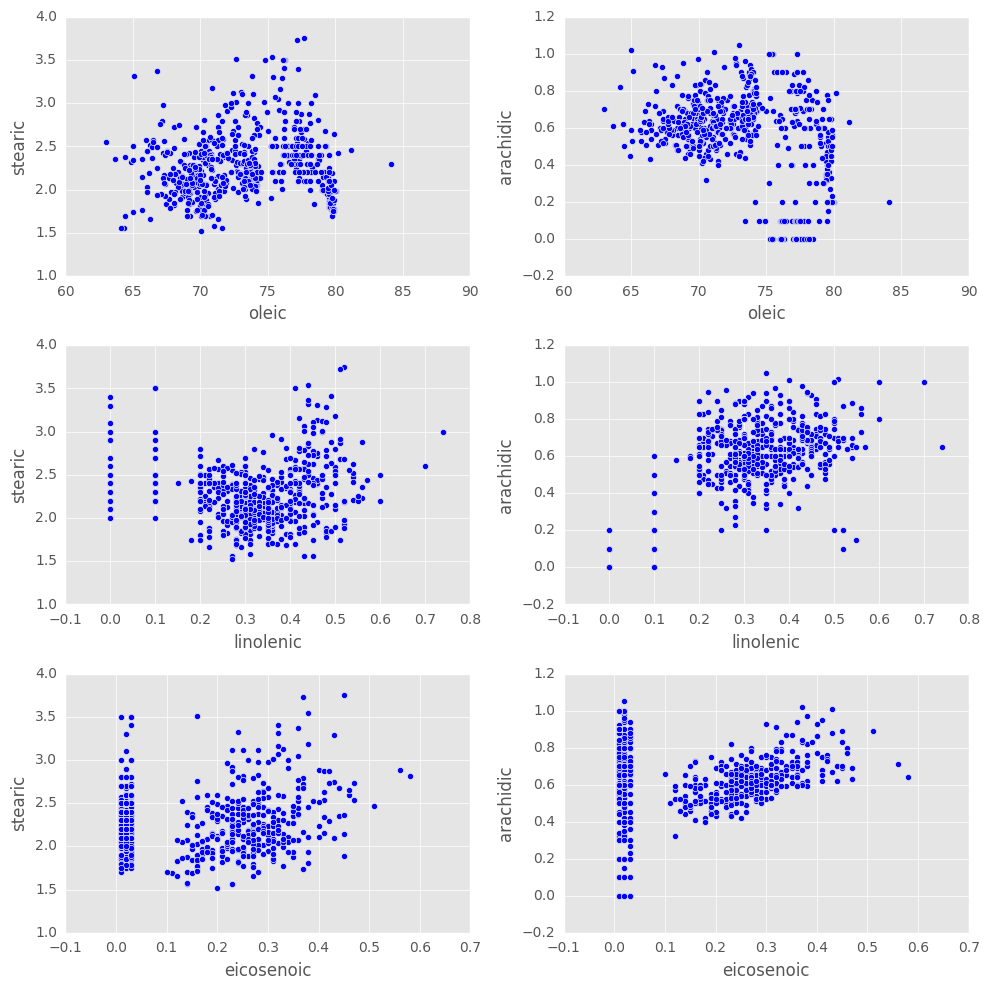

In [222]:
xacids=['oleic','linolenic','eicosenoic']
yacids=['stearic','arachidic']

#your code here
fig, axes=plt.subplots(figsize=(10,10), nrows=len(xacids), ncols=len(yacids))
for i, xacid in enumerate(xacids):
    for j, yacid in enumerate(yacids):
        axes[i][j].scatter(olives[xacid],olives[yacid])
        axes[i][j].set_xlabel(xacid)
        axes[i][j].set_ylabel(yacid)
fig.tight_layout()

In [223]:
region_groupby = olives.groupby('region')
print(type(region_groupby))
region_groupby.head()

<class 'pandas.core.groupby.DataFrameGroupBy'>


,area_string,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
323,Inland-Sardinia,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02
324,Inland-Sardinia,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03
325,Inland-Sardinia,2,5,11.03,0.96,2.10,73.80,10.85,0.32,0.94,0.03
326,Inland-Sardinia,2,5,11.18,0.97,2.21,72.79,11.54,0.35,0.94,0.02
327,Inland-Sardinia,2,5,10.52,0.95,2.15,73.88,11.26,0.31,0.92,0.01


In [224]:
for key, value in region_groupby:
    print("( key, type(value) ) = (", key, ",", type(value), ")")
    v=value

v.head()

('( key, type(value) ) = (', 1, ',', <class 'pandas.core.frame.DataFrame'>, ')')
('( key, type(value) ) = (', 2, ',', <class 'pandas.core.frame.DataFrame'>, ')')
('( key, type(value) ) = (', 3, ',', <class 'pandas.core.frame.DataFrame'>, ')')


,area_string,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
421,Umbria,3,9,10.85,0.70,1.80,79.55,6.05,0.20,0.50,0.01
422,Umbria,3,9,10.85,0.70,1.85,79.55,6.00,0.25,0.55,0.01
423,Umbria,3,9,10.90,0.60,1.90,79.50,6.00,0.28,0.47,0.02
424,Umbria,3,9,10.80,0.65,1.89,79.60,6.02,0.35,0.20,0.01
425,Umbria,3,9,10.90,0.60,1.95,79.55,6.00,0.28,0.42,0.02


In [225]:
dfrd = region_groupby.describe()
print(type(dfrd))
dfrd.head(25)

<class 'pandas.core.frame.DataFrame'>


region        area    palmitic  palmitoleic     stearic       oleic    linoleic   linolenic   arachidic  eicosenoic
region                                                                                                                           
1      count   323.0  323.000000  323.000000   323.000000  323.000000  323.000000  323.000000  323.000000  323.000000  323.000000
       mean      1.0    2.783282   13.322879     1.548019    2.287740   71.000093   10.334985    0.380650    0.631176    0.273220
       std       0.0    0.741054    1.529349     0.507237    0.398709    3.451431    2.106730    0.079727    0.111644    0.083915
       min       1.0    1.000000    8.750000     0.350000    1.520000   63.000000    4.480000    0.200000    0.320000    0.100000
       25%       1.0    2.500000   12.680000     1.215000    2.015000   68.830000    8.555000    0.320000    0.560000    0.220000
       50%       1.0    3.000000   13.460000     1.630000    2.230000   70.300000   10.900000    0.370000    0.620000    0.270000
       75%       1.0    3.000000   14.190000     1.850000    2.495000   72.835000   12.025000    0.440000    0.690000    0.320000
       max       1.0    4.000000   17.530000     2.800000    3.750000   81.130000   14.620000    0.740000    1.020000    0.580000
2      count    98.0   98.000000   98.000000    98.000000   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000
       mean      2.0    5.336735   11.113469     0.967449    2.261837   72.680204   11.965306    0.270918    0.731735    0.019388
       std       0.0    0.475023    0.404111     0.138514    0.176363    1.418783    1.072336    0.053844    0.118826    0.007436
       min       2.0    5.000000   10.300000     0.350000    1.990000   68.820000   10.570000    0.150000    0.450000    0.010000
       25%       2.0    5.000000   10.852500     0.882500    2.120000   71.372500   11.122500    0.230000    0.660000    0.010000
       50%       2.0    5.000000   11.075000     0.960000    2.220000   73.255000   11.465000    0.270000    0.720000    0.020000
       75%       2.0    6.000000   11.372500     1.040000    2.395000   73.810000   13.065000    0.300000    0.810000    0.020000
       max       2.0    6.000000   12.130000     1.350000    2.720000   74.390000   14.700000    0.430000    1.050000    0.030000
3      count   151.0  151.000000  151.000000   151.000000  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000
       mean      3.0    8.006623   10.948013     0.837351    2.308013   77.930530    7.270331    0.217881    0.375762    0.019735
       std       0.0    0.820542    0.825635     0.264388    0.389560    1.648155    1.431226    0.168865    0.293586    0.007298
       min       3.0    7.000000    6.100000     0.150000    1.700000   73.400000    5.100000    0.000000    0.000000    0.010000
       25%       3.0    7.000000   10.600000     0.690000    2.000000   76.800000    6.020000    0.100000    0.100000    0.010000
       50%       3.0    8.000000   10.900000     0.800000    2.300000   78.000000    6.800000    0.200000    0.380000    0.020000
       75%       3.0    9.000000   11.250000     1.000000    2.500000   79.500000    8.250000    0.350000    0.595000    0.025000
       max       3.0    9.000000   14.000000     1.800000    3.500000   84.100000   10.500000    0.700000    1.000000    0.030000

So, one may iterate through the groupby 'dictionary', get the pandas series from each sub-dataframe, and compute the standard deviation using the std function (find documentation of std here):

In [226]:
vecs=[]
keys=[]
for key, value in region_groupby:
    k = key
    v = value.std()
print(k)
print(type(v))
print(v)

3
<class 'pandas.core.series.Series'>
region         0.000000
area           0.820542
palmitic       0.825635
palmitoleic    0.264388
stearic        0.389560
oleic          1.648155
linoleic       1.431226
linolenic      0.168865
arachidic      0.293586
eicosenoic     0.007298
dtype: float64


Or one might let pandas take care of concatenating the series obtained by running std on each dataframe back into a dataframe for us. Notice that the output dataframe is automatically indexed by region for us!

In [ ]:
dfbystd = olives.groupby('region').std()
dfbystd.head()

In [ ]:
dfbymean = region_groupby.aggregate(mean)
dfbymean.head()

The `groupby` function also acts like an object that can be **mapped**. After the mapping is complete, the rows are put together (**reduced**) into a larger dataframe. For example, using the `describe` function. The documentation of the `describe` function can be found <a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.describe.html">here</a>.

In [ ]:
region_groupby.aggregate(lambda x: x.palmitic.mean()) #probably not what u had in mind :-)

In [ ]:
region_groupby.apply(lambda f: f.palmitic.mean())

In [ ]:
region_groupby.apply(lambda f: f.mean())

In [ ]:
#rename the columns in `dfbymean` and `dfbystd`.
renamedict_std={k:k+"_std" for k in acidlist}
renamedict_mean={k:k+"_mean" for k in acidlist}
dfbystd.rename(inplace=True, columns=renamedict_std)
dfbymean.rename(inplace=True, columns=renamedict_mean) 
dfbystd.head()

In [ ]:
dfpalmiticmean = dfbymean[['palmitic_mean']] 
dfpalmiticstd = dfbystd[['palmitic_std']] 

newdfbyregion=dfpalmiticmean.join(dfpalmiticstd)
newdfbyregion.head()

In [ ]:
olives.shape

In [ ]:
weights = np.random.uniform(size = olives.shape[0])
smallerdf = olives[['palmitic']]
otherdf = olives[['region']]

In [ ]:
otherdf['weight'] = weights
otherdf.head()

In [ ]:
smallerdf = smallerdf.join(otherdf)
smallerdf.head()

In [ ]:
def wfunc(f):
    return (f.palmitic*f.weight).sum()/f.weight.sum()

smallerdf.groupby('region').apply(wfunc)

In [ ]:
def myfunc(column):
    return np.sum(column)
    
region_groupby.aggregate(myfunc)

In [ ]:
rkeys = [1,2,3]
rvals = ['South','Sardinia','North']
rmap = {e[0] : e[1] for e in zip(rkeys,rvals)}
rmap

In [ ]:
mdf2 = olives.groupby('region').aggregate(mean)
mdf2 = mdf2[acidlist]
mdf2.head()

In [ ]:
ax=mdf2.plot(kind='barh', stacked=True)
ax.set_yticklabels(rvals)
ax.set_xlim([0,100])

In [ ]:
olives.palmitic.hist()

The above graph get's proportions of all the acids in each region. We can ask the opposite question: for each acid, what's the distribution of regions?

In [ ]:
fig, axes = plt.subplots(figsize = (10,20), nrows = len(acidlist), ncols=1)

i=0

for ax in axes.flatten():
    acid = acidlist[i]
    seriesacid = olives[acid]#get the Pandas series
    minmax = [seriesacid.min(), seriesacid.max()]
    for k,g in olives.groupby('region'):
        style = {'histtype':'stepfilled', 'alpha':0.5, 'label':rmap[k], 'ax':ax}
        g[acid].hist(**style)
        ax.set_xlim(minmax)
        ax.set_title(acid)
        ax.grid(False)
    #construct legend
    ax.legend()
    i = i + 1
fig.tight_layout()

You can see that oleic dominates, and doesn't let us see much about the other acids. Remove it and let's draw bar plots again.

In [ ]:
acidlistminusoleic = ['palmitic', 'palmitoleic', 'stearic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']

ax = region_groupby.aggregate(mean)[acidlistminusoleic].plot(kind = "barh", stacked = True)
ax.set_yticklabels(rvals);

Note that there are no eicosenoic acids in regions 2 and 3, which are Sardinia and the North respectively

In [ ]:
import matplotlib.colors as colors

In [ ]:
# just do the boxplot without the marginals to split the north out
mycolors = ['#348ABD', '#A60628', '#7A68A6', '#467821','#D55E00',  '#CC79A7', 
           '#56B4E9', '#009E73', '#F0E442']
cmap = colors.ListedColormap(mycolors)
a = np.outer(np.arange(0,1,0.01),np.ones(10))
plt.imshow(a.T, cmap=cmap, origin="lower");

In [ ]:
def make2d_eda(df, scatterx, scattery, by = "region", labeler = {}):
    
    figure = plt.figure(figsize=(8,8))
    ax = plt.gca()
    cs = list(np.linspace(0,1,len(df.groupby(by))))
    xlimsd = {}
    ylimsd = {}
    xs = {}
    ys = {}
    
    for k,g in df.groupby(by):
        col = cs.pop()
        x = g[scatterx]
        y = g[scattery]
        c = cmap(col)
        ax.scatter(x, y, c = c, label = labeler.get(k,k), s = 40, alpha = 0.4);
        xlimsd[k] = ax.get_xlim()
        ylimsd[k] = ax.get_ylim()
    
    xlims = [min([xlimsd[k][0] for k in xlimsd]), max([xlimsd[k][1] for k in xlimsd])]
    ylims = [min([ylimsd[k][0] for k in ylimsd]), max([ylimsd[k][1] for k in ylimsd])]
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_xlabel(scatterx)
    ax.set_ylabel(scattery)
    ax.grid(False)
    return ax

a = make2d_eda(olives, "linoleic","arachidic", labeler=rmap)

a.legend(loc='upper right');

**A nonlinear, or even marginally linear classifier could separate the north from Sardinia!**

We use the really ugly trellis rplot interface in Pandas to do some hierarchical digging. We plot oleic against linoleic. **We can split Sardinia. We might be able to split East Liguria out but there could be significant misclassification.**

In [ ]:
import pandas.tools.rplot as rplot

olives_copy = olives.copy()
olives_copy['region'] = olives_copy['region'].map(rmap)
imap = {e[0]:e[1] for e in zip (olives.area.unique(), olives.areastring.unique())}

#dfcopy['area']=dfcopy['area'].map(imap)

plt.figure(figsize=(10, 8))

plot = rplot.RPlot(olives_copy, x = 'linoleic', y = 'oleic');
plot.add(rplot.TrellisGrid(['region', '.']))
plot.add(rplot.GeomPoint(size = 40.0, alpha = 0.3, colour = rplot.ScaleRandomColour('area')));

fig = plot.render()
print(olives.areastring.unique())

In [ ]:
plt.figure(figsize=(10, 8))

plot = rplot.RPlot(olives_copy, x = 'palmitic', y = 'palmitoleic');
plot.add(rplot.TrellisGrid(['region', '.']))
plot.add(rplot.GeomPoint(size = 40.0, alpha = 0.3, colour = rplot.ScaleRandomColour('area')));
fig = plot.render()

print(olives_copy.area_string.unique())

### Pandas and SQL

Pandas can read from HTML, JSON, SQL, Excel, HDF5, Stata, and a few other things. 

You can read data from a SQL database using the `pd.read_sql` function. `read_sql` will automatically convert SQL column names to DataFrame column names. It takes 2 arguments: a SELECT statement, and a database connection object. This is great because it means you can read from any kind of SQL database -- it doesn't matter if it's MySQL, SQLite, PostgreSQL, or something else.

This example reads from a SQLite database, but any other database would work the same way.

In [ ]:
import sqlite3

In [ ]:
con = sqlite3.connect("data/weather_2012.sqlite")
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con)
df

`read_sql` doesn't automatically set the primary key (id) to be the index of the dataframe. You can make it do that by adding an index_col argument to read_sql.

If you've used `read_csv` a lot, you may have seen that it has an `index_col` argument as well. This one behaves the same way.

In [ ]:
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con, index_col='id')
df

If you want your dataframe to be indexed by more than one column, you can give a list of columns to index_col:

In [ ]:
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con, 
                 index_col=['id', 'date_time'])
df

Pandas has a `write_frame` function which creates a database table from a dataframe. Right now this only works for SQLite databases. Let's use it to move our 2012 weather data into SQL.

You'll notice that this function is in pd.io.sql. There are a [ton of useful functions](http://pandas.pydata.org/pandas-docs/stable/io.html) for reading and writing various kind of data in pd.io, and it's worth spending some time exploring them. 

In [ ]:
weather_df = pd.read_csv('data/weather_2012.csv')
#build connection
con = sqlite3.connect("data/test_db.sqlite")
#run query
con.execute("DROP TABLE IF EXISTS weather_2012")
#write
weather_df.to_sql("weather_2012", con)

We can now read from the weather_2012 table in  test_db.sqlite, and we see that we get the same data back:

In [ ]:
con = sqlite3.connect("data/test_db.sqlite")
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con)
df

The nice thing about having your data in a database is that you can do arbitrary SQL queries. This is cool especially if you're more familiar with SQL. 

Here's an example of sorting by the Weather column:

In [ ]:
con = sqlite3.connect("data/test_db.sqlite")
df = pd.read_sql("SELECT * from weather_2012 ORDER BY Weather LIMIT 3", con)
df

If you have a PostgreSQL database or MySQL database, reading from it works exactly the same way as reading from a SQLite database. 

You create a connection using `psycopg2.connect()` or `MySQLdb.connect()`, and then use

`pd.read_sql("SELECT whatever from your_table", con)`